# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Откройте файл с данными и изучите общую информацию. 

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

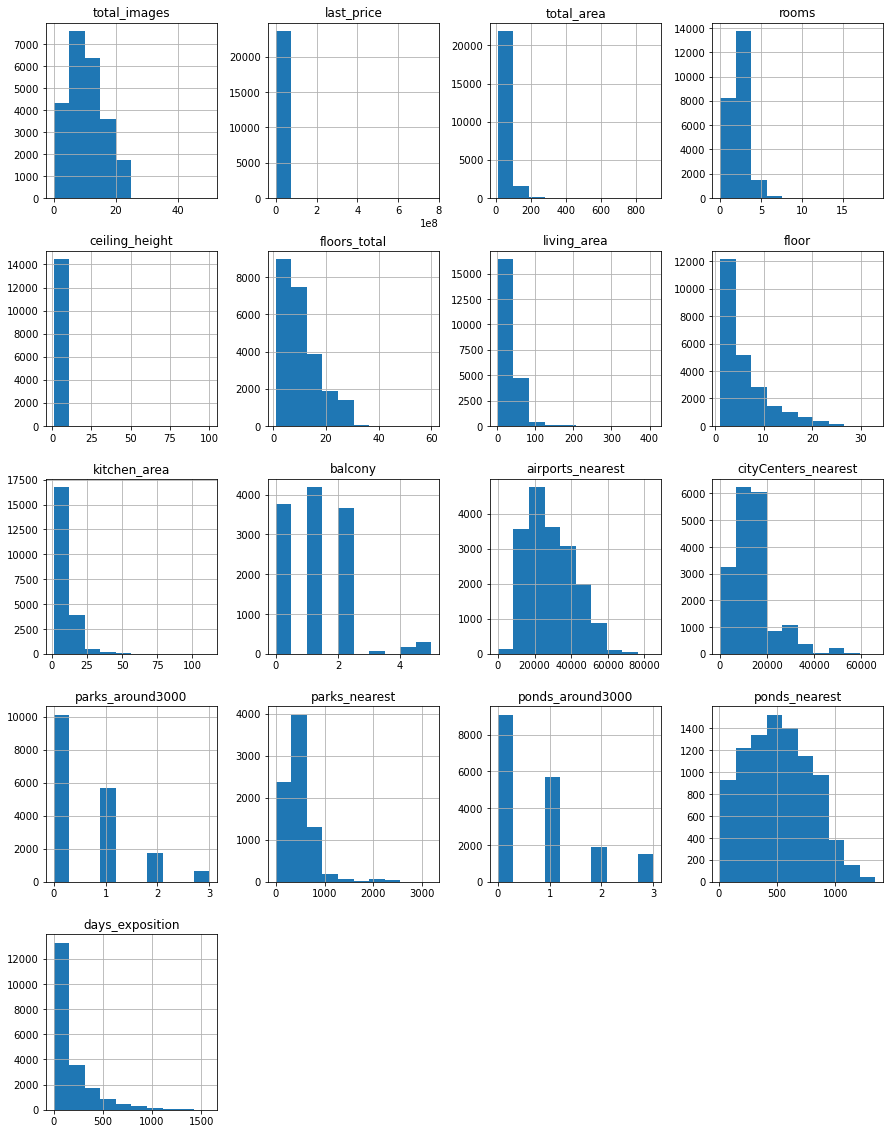

In [5]:
data.hist(figsize=(15, 20))

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<b>Вывод</b>

Были обнаружены следующие пропущенные значения и ошибки в типах данных:
<br><code>ceiling_height</code> — высота потолков (м). Ошибки ручного ввода: может быть указана высота потолков 25 м и 32 м.
<br><code>floors_total</code>  — всего этажей в доме. Нулевые значения. Должен быть тип int, т.к. количество этажей.
<br><code>living_area</code> — жилая площадь в квадратных метрах (м²).  Нулевые значения.
<br><code>is_apartment</code> — должен быть тип bool.  Нулевые значения.
<br><code>kitchen_area</code> — площадь кухни в квадратных метрах (м²). Нулевые значения.
<br><code>balcony</code> — число балконов.  Нулевые значения.
<br><code>airports_nearest</code> — расстояние до ближайшего аэропорта в метрах (м).  Нулевые значения.
<br><code>cityCenters_nearest</code> — расстояние до центра города (м).  Нулевые значения.
<br><code>parks_around3000</code>  — число парков в радиусе 3 км. Тип должен быть int.  Нулевые значения.
<br><code>parks_nearest</code> — расстояние до ближайшего парка (м).  Нулевые значения.
<br><code>ponds_around3000</code> — число водоёмов в радиусе 3 км. Тип должен быть int.  Нулевые значения.
<br><code>ponds_nearest</code> — расстояние до ближайшего водоёма (м).  Нулевые значения.
<br><code>days_exposition</code> — сколько дней было размещено объявление (от публикации до снятия). Нулевые значения. Тип должен быть int
<br><code>first_day_exposition</code> - дата публикации. Тип должен быть datetime

### Предобработка данных

<b>Заполним пропуски, где можно найти логическую замену и заменим тип данных.

In [8]:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [9]:
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['airports_nearest'] = data['airports_nearest'].fillna(0).astype('int')                     
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')           
data['parks_nearest'] = data['parks_nearest'].fillna(0).astype('int') 
data['ponds_nearest'] = data['ponds_nearest'].fillna(0).astype('int') 
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [109]:
data['living_area_ratio'] = data['living_area']/data['total_area']
data['living_area_ratio_mean'] = data['living_area_ratio'].mean()
data['living_area_mean'] = data['living_area_ratio_mean'] * data['living_area']

In [12]:
for living_area in data.index:
    data.loc[(data['living_area'].isna()), 'living_area'] = data.loc[living_area, 'living_area_mean']

# посчитаем количество пропущенных значений после проделанной замены
data['living_area'].isna().value_counts()

False    23699
Name: living_area, dtype: int64

In [13]:
data['living_area'] = data['living_area'].astype('int') 

In [110]:
data['living_area']

0        51
1        18
2        34
3        28
4        32
         ..
23694    73
23695    38
23696    29
23697    28
23698    12
Name: living_area, Length: 23650, dtype: int32

In [14]:
data['kitchen_area_ratio'] = data['kitchen_area']/data['total_area']
data['kitchen_area_ratio_mean'] = data['kitchen_area_ratio'].mean()
data['kitchen_area_mean'] = data['kitchen_area_ratio_mean'] * data['kitchen_area']

In [15]:
for kitchen_area in data.index:
    data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data.loc[living_area, 'kitchen_area_mean']

# посчитаем количество пропущенных значений после проделанной замены
data['kitchen_area'].isna().value_counts()

False    23699
Name: kitchen_area, dtype: int64

In [16]:
data['kitchen_area'] = data['kitchen_area'].astype('int') 

In [111]:
data['kitchen_area']

0        25
1        11
2         8
3         1
4        41
         ..
23694    13
23695     8
23696     1
23697    23
23698     9
Name: kitchen_area, Length: 23650, dtype: int32

In [17]:
data['floors_total'] = data['floors_total'].fillna(0).astype('int')
data['floors_total'] = data['floors_total'].dropna()
data['floors_total'].isna().value_counts()

False    23699
Name: floors_total, dtype: int64

<b>Высота потолков <code>ceiling_height</code>

In [18]:
data['ceiling_height'].value_counts()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

<AxesSubplot:ylabel='Frequency'>

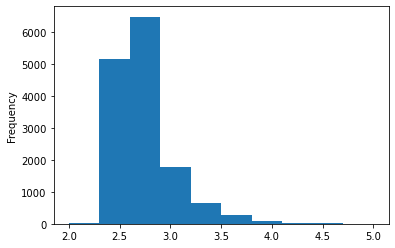

In [19]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', range=(2,5))

In [20]:
data[data['ceiling_height'] > 5].sort_values('ceiling_height').tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,living_area_ratio_mean,living_area_mean,kitchen_area_ratio,kitchen_area_ratio_mean,kitchen_area_mean
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2,73,2,True,...,0,0,0,27.0,0.744898,0.564766,41.227883,0.091837,0.187355,1.686193
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24,37,19,False,...,0,0,0,61.0,0.897619,0.564766,21.291660,0.261905,0.187355,2.060902
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3,53,2,NaN,...,0,0,0,NaN,0.706667,0.564766,29.932573,0.106667,0.187355,1.498838
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6,55,5,False,...,0,3,511,NaN,0.600649,0.564766,31.344486,0.178571,0.187355,3.091353
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5,14,5,True,...,223,3,30,19.0,0.560000,0.564766,7.906717,0.440000,0.187355,2.060902


In [21]:
ceiling_medians = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

,median,count
floors_total,,
0,2.8,9
1,2.8,10
2,2.7,215
3,2.8,399
4,3.0,789


In [22]:
# заменяем значения высоты потолков на  медиану
for floor in ceiling_medians.index:
    data.loc[(data['floors_total'].isna()) | 
             ((data['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = data['ceiling_height'].describe()[5]

# медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

# посчитаем количество пропущенных значений после проделанной замены
data['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

<b>Сколько дней было размещено объявление <code>days_exposition</code>

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['days_exposition'].isna().value_counts()

False    20518
True      3181
Name: days_exposition, dtype: int64

<b>Апартаменты <code>is_apartment</code>

In [24]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [25]:
data[['is_apartment', 'first_day_exposition']]

,is_apartment,first_day_exposition
0,NaN,2019-03-07
1,NaN,2018-12-04
2,NaN,2015-08-20
3,NaN,2015-07-24
4,NaN,2018-06-19
...,...,...
23694,NaN,2017-03-21
23695,NaN,2018-01-15
23696,NaN,2018-02-11
23697,NaN,2017-03-28


In [26]:
data[data['is_apartment'] == True].sort_values(by='first_day_exposition').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,living_area_ratio_mean,living_area_mean,kitchen_area_ratio,kitchen_area_ratio_mean,kitchen_area_mean
1109,1,34878556.0,95.8,2014-12-09,2,3.00,6,58,5,True,...,160,3,569,1572.0,0.608559,0.564766,32.925830,0.208768,0.187355,3.747095
11492,1,46424072.0,92.4,2014-12-09,2,3.00,6,54,6,True,...,160,3,569,1030.0,0.593074,0.564766,30.949151,0.216450,0.187355,3.747095
10867,1,56844500.0,177.9,2015-01-15,3,3.00,6,87,5,True,...,160,3,569,NaN,0.490163,0.564766,49.247553,0.490163,0.187355,16.337333
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301,7,True,...,110,0,0,1078.0,0.594675,0.564766,170.276805,0.089744,0.187355,8.524641
7521,16,43500000.0,245.8,2015-12-17,3,4.45,7,170,7,True,...,110,0,0,1067.0,0.694874,0.564766,96.461951,0.101709,0.187355,4.683868


In [27]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment']= data['is_apartment'].astype('bool')
data['is_apartment'].isna().value_counts()

False    23699
Name: is_apartment, dtype: int64

In [28]:
data.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height                0
floors_total                  0
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                49
airports_nearest              0
cityCenters_nearest        5519
parks_around3000              0
parks_nearest                 0
ponds_around3000              0
ponds_nearest                 0
days_exposition            3181
living_area_ratio          1903
living_area_ratio_mean        0
living_area_mean           1903
kitchen_area_ratio         2278
kitchen_area_ratio_mean       0
kitchen_area_mean          2278
dtype: int64

<b>Неявные дубликаты <code>locality_name</code>

In [29]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [31]:
data['locality_name'] = data['locality_name'].fillna(0)
data = data.drop(data[data['locality_name'] == 0].index)
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [32]:
def replace_wrong_values(wrong_values, correct_value):
    for wrong_value in wrong_values: 
        if wrong_value in wrong_values:
            data['locality_name'] = data['locality_name'].replace(to_replace=wrong_value, value=correct_value, regex=True)

duplicates = ['посёлок городского типа', 'поселок городского типа', 'посёлок', 'поселок станции', 'посёлок станции', 'городской посёлок', 'городской поселок', 'коттеджный поселок', 'коттеджный посёлок']
locality_name = 'поселок'
replace_wrong_values(duplicates, locality_name)

In [33]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [34]:
cityCenters_nearest_pivot_table = data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=['mean', 'count'])
cityCenters_nearest_pivot_table.columns = ['mean', 'count']
cityCenters_nearest_pivot_table.head()

,mean,count
locality_name,,
Зеленогорск,54617.583333,24
Колпино,32113.771513,337
Красное Село,30020.284091,176
Кронштадт,49195.726316,95
Ломоносов,50739.969697,132


In [35]:
for city in cityCenters_nearest_pivot_table.index:
    data.loc[(data['locality_name'].isna()) | 
             ((data['locality_name'] == city) & (cityCenters_nearest_pivot_table.loc[city, 'count'] == 0)), 
             'cityCenters_nearest'] = data['cityCenters_nearest'].describe()[5]


for city in cityCenters_nearest_pivot_table.index:
    data.loc[(data['cityCenters_nearest'].isna()) & 
             (data['locality_name'] == city), 
             'cityCenters_nearest'] = cityCenters_nearest_pivot_table.loc[city, 'mean']


data['cityCenters_nearest'].isna().value_counts()

False    23650
Name: cityCenters_nearest, dtype: int64

In [36]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')

<b>Вывод</b>

<br><code>ceiling_height</code> — Часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.).Все пропущенные значения обработаны: была сделана замена на медиану для зданий конкретной этажности (либо на общую медиану).
<br><code>floors_total</code>  — Все строки с пропущенными значениями были удалены. Тип изменен на int.
<br><code>living_area</code> — Все строки с пропущенными значениями были заменены на среднее значение. Тип изменен на int.
<br><code>is_apartment</code> — Все строки с пропущенными значениями были заменены на False. Тип изменен на bool.
<br><code>kitchen_area</code> — Все строки с пропущенными значениями были заменены на среднее значение. Тип изменен на int.
<br><code>balcony</code> — Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Все строки с пропущенными значениями были заменены на 0.
<br><code>airports_nearest</code> — Все строки с пропущенными значениями были заменены на 0. Тип изменен на int..
<br><code>cityCenters_nearest</code> — Все строки с пропущенными значениями были заменены на среднее значение. Тип изменен на int.
<br><code>parks_around3000</code>  — Все строки с пропущенными значениями были заменены на 0. Тип изменен на int.
<br><code>parks_nearest</code> — Все строки с пропущенными значениями были заменены на 0. Тип изменен на int.
<br><code>ponds_around3000</code> — Все строки с пропущенными значениями были заменены на 0. Тип изменен на int.
<br><code>ponds_nearest</code> — Все строки с пропущенными значениями были заменены на 0. Тип изменен на int.
<br><code>days_exposition</code> —  Пропущенные значения были оставлены как есть. Тип изменен на int.
<br><code>first_day_exposition</code> -  Тип изменен на datetime.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23650 non-null  int64         
 1   last_price               23650 non-null  float64       
 2   total_area               23650 non-null  float64       
 3   first_day_exposition     23650 non-null  datetime64[ns]
 4   rooms                    23650 non-null  int64         
 5   ceiling_height           23650 non-null  float64       
 6   floors_total             23650 non-null  int32         
 7   living_area              23650 non-null  int32         
 8   floor                    23650 non-null  int64         
 9   is_apartment             23650 non-null  bool          
 10  studio                   23650 non-null  bool          
 11  open_plan                23650 non-null  bool          
 12  kitchen_area             23650 n

<code>days_exposition</code>

<AxesSubplot:ylabel='Frequency'>

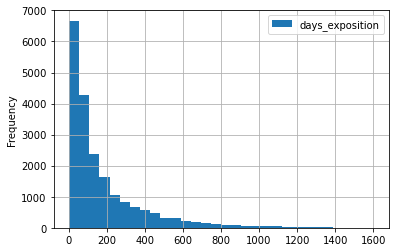

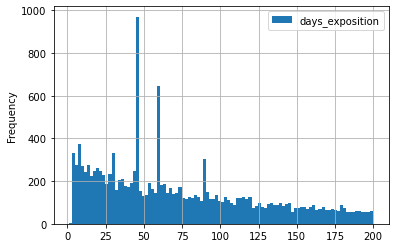

In [38]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

C:\Users\lera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_exposition'>

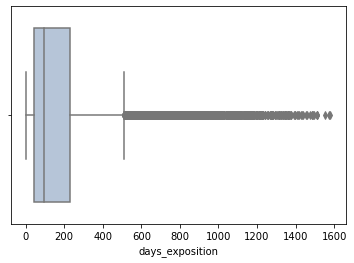

In [39]:
sns.boxplot(data['days_exposition'], color='lightsteelblue')

In [40]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [41]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      203
         ... 
1553.0      1
793.0       1
1434.0      1
1231.0      1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

<div class="alert alert-block alert-info">
<b>Вывод:</b> Слишком быстрая продажа — до 1 месяца (особенно аномальные сроки меньше 2 недель) и слишком долгая продажа.

<code>'ceiling_height'</code>

In [42]:
print(data['ceiling_height'].describe())

count    23650.000000
mean         2.735960
std          0.995214
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64


In [43]:
print(data['ceiling_height'].value_counts())

2.55     4294
2.50     3515
2.70     3264
2.75     2416
2.60     2291
         ... 
4.65        1
5.00        1
24.00       1
4.06        1
3.59        1
Name: ceiling_height, Length: 184, dtype: int64


C:\Users\lera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Высота потолков, м')

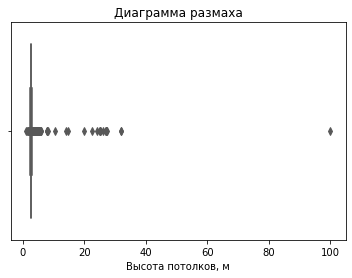

In [44]:
sns.boxplot(data['ceiling_height'], color='tab:purple')
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')

C:\Users\lera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


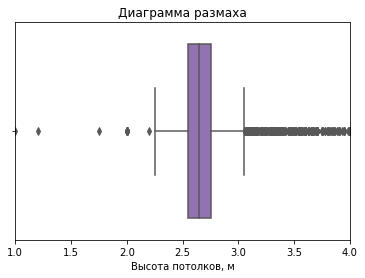

In [45]:
sns.boxplot(data['ceiling_height'], color='tab:purple')
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')
_ = plt.xlim(1, 4)

<div class="alert alert-block alert-info">
<b>Вывод:</b> Квартиры с очень низкими или слишком высокими потолками.


<code>rooms</code>

In [46]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [47]:
data['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

C:\Users\lera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Число комнат, шт.')

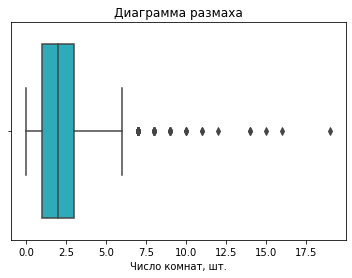

In [48]:
sns.boxplot(data['rooms'], color='tab:cyan')
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')

C:\Users\lera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


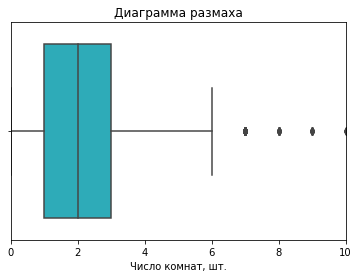

In [49]:
sns.boxplot(data['rooms'], color='tab:cyan')
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')
_ = plt.xlim(0, 10)

C:\Users\lera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


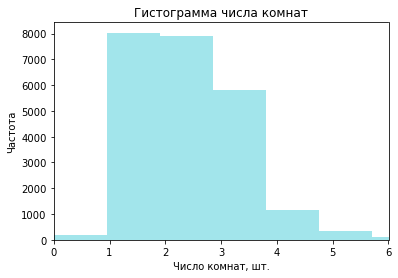

In [50]:
sns.distplot(data['rooms'], kde=False, bins=20, color='tab:cyan')
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')

<div class="alert alert-block alert-info">

<b>Вывод</b>: 7-комнатная квартира или больше


<code>last_price</code>

In [51]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

C:\Users\lera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Цены, 10 млн рублей')

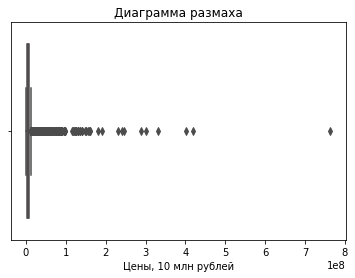

In [52]:
sns.boxplot(data['last_price'], color='tab:red')
plt.title('Диаграмма размаха')
plt.xlabel('Цены, 10 млн рублей')

<div class="alert alert-block alert-info">
понятно, что ничего не понятно...

In [53]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     289
4300000.0     260
4000000.0     260
4200000.0     258
             ... 
12890000.0      1
29375000.0      1
7545600.0       1
5205000.0       1
11475000.0      1
Name: last_price, Length: 2964, dtype: int64

C:\Users\lera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


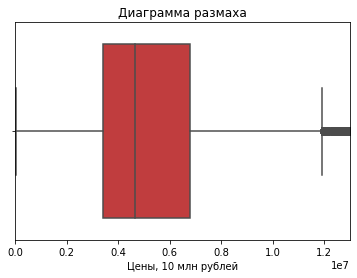

In [54]:
sns.boxplot(data['last_price'], color='tab:red')
plt.title('Диаграмма размаха')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.xlim(0, 13000000)

C:\Users\lera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


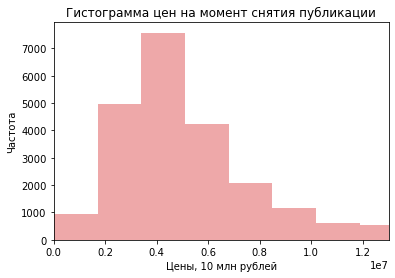

In [55]:
sns.distplot(data['last_price'], kde=False, bins=450, color='tab:red')
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Частота')

<div class="alert alert-block alert-info">
<b>Вывод:</b> цены более 12 млн рублей

### Посчитайте и добавьте в таблицу новые столбцы

<b>Цена одного квадратного метра

In [56]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [57]:
data['price_per_square_meter']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_per_square_meter, Length: 23650, dtype: float64

In [58]:
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

In [59]:
data['price_per_square_meter']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_square_meter, Length: 23650, dtype: int32

<b>День недели публикации объявления

In [60]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [61]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_area_ratio,living_area_ratio_mean,living_area_mean,kitchen_area_ratio,kitchen_area_ratio_mean,kitchen_area_mean,price_per_square_meter,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,...,755,NaN,0.472222,0.564766,28.803042,0.231481,0.187355,4.683868,120370,3
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18,1,False,...,0,81.0,0.460396,0.564766,10.504639,0.272277,0.187355,2.060902,82920,1
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34,4,False,...,574,558.0,0.612500,0.564766,19.371457,0.148214,0.187355,1.555044,92785,3
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,28,9,False,...,234,424.0,NaN,0.564766,NaN,NaN,0.187355,NaN,408176,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32,13,False,...,48,121.0,0.320000,0.564766,18.072497,0.410000,0.187355,7.681544,100000,1


<b>Месяц публикации объявления

In [62]:
data['month'] = data['first_day_exposition'].dt.month

In [63]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,living_area_ratio,living_area_ratio_mean,living_area_mean,kitchen_area_ratio,kitchen_area_ratio_mean,kitchen_area_mean,price_per_square_meter,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,...,NaN,0.472222,0.564766,28.803042,0.231481,0.187355,4.683868,120370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18,1,False,...,81.0,0.460396,0.564766,10.504639,0.272277,0.187355,2.060902,82920,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34,4,False,...,558.0,0.612500,0.564766,19.371457,0.148214,0.187355,1.555044,92785,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,28,9,False,...,424.0,NaN,0.564766,NaN,NaN,0.187355,NaN,408176,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32,13,False,...,121.0,0.320000,0.564766,18.072497,0.410000,0.187355,7.681544,100000,1,6


<b>Год публикации объявления

In [64]:
data['year'] = data['first_day_exposition'].dt.year

In [65]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,living_area_ratio,living_area_ratio_mean,living_area_mean,kitchen_area_ratio,kitchen_area_ratio_mean,kitchen_area_mean,price_per_square_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,...,0.472222,0.564766,28.803042,0.231481,0.187355,4.683868,120370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18,1,False,...,0.460396,0.564766,10.504639,0.272277,0.187355,2.060902,82920,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34,4,False,...,0.612500,0.564766,19.371457,0.148214,0.187355,1.555044,92785,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,28,9,False,...,NaN,0.564766,NaN,NaN,0.187355,NaN,408176,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32,13,False,...,0.320000,0.564766,18.072497,0.410000,0.187355,7.681544,100000,1,6,2018


<b>Тип этажа квартиры 

In [66]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [67]:
data['floor_category'] = data.apply(floor_category, axis = 1)

In [68]:
data[['floors_total', 'floor', 'floor_category']]

,floors_total,floor,floor_category
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,9,другой
4,14,13,другой
...,...,...,...
23694,5,3,другой
23695,5,4,другой
23696,3,1,первый
23697,17,12,другой


<b>Расстояние до центра города в километрах

In [69]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

In [70]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

In [71]:
data['cityCenters_nearest_km']

0        16
1        18
2        13
3         6
4         8
         ..
23694     4
23695    13
23696    13
23697    10
23698    13
Name: cityCenters_nearest_km, Length: 23650, dtype: int32

### Проведите исследовательский анализ данных

<b>Общая площадь


total_area


count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

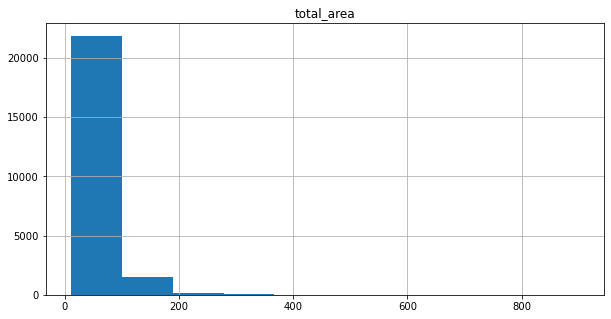

----------------------------------------

living_area


count    23650.000000
mean        33.704440
std         21.203165
min          2.000000
25%         19.000000
50%         29.000000
75%         41.000000
max        409.000000
Name: living_area, dtype: float64

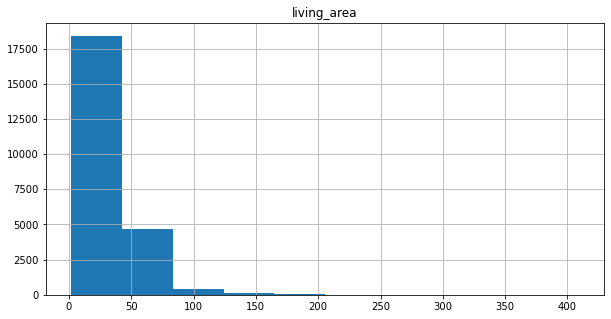

----------------------------------------

kitchen_area


count    23650.000000
mean         9.424101
std          6.256861
min          1.000000
25%          6.000000
50%          9.000000
75%         11.000000
max        112.000000
Name: kitchen_area, dtype: float64

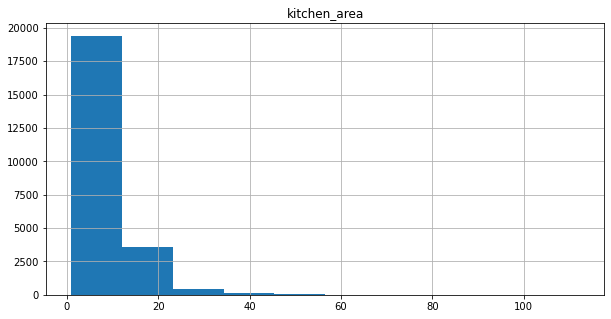

----------------------------------------

last_price


count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

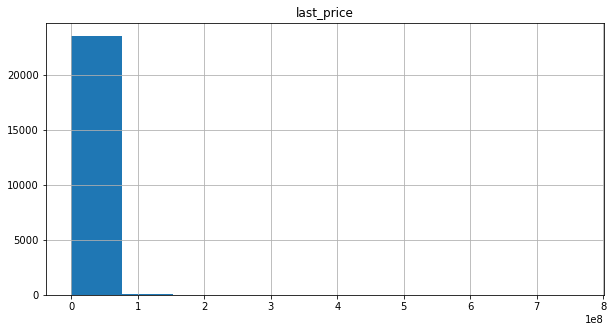

----------------------------------------

rooms


count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

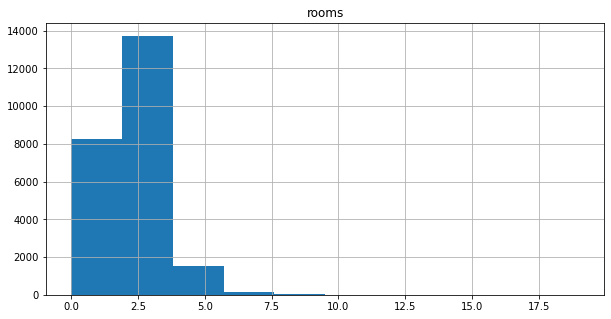

----------------------------------------

floor


count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

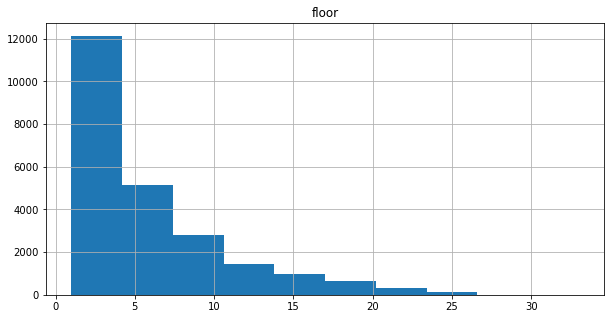

----------------------------------------

floors_total


count    23650.000000
mean        10.637505
std          6.613891
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

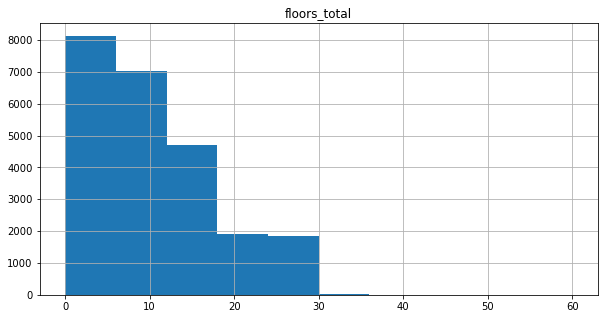

----------------------------------------

ceiling_height


count    23650.000000
mean         2.735960
std          0.995214
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

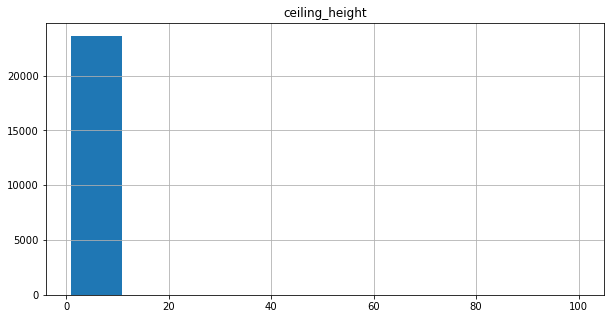

----------------------------------------

cityCenters_nearest


count    23650.000000
mean     14172.473700
std       7681.126719
min        181.000000
25%      10939.000000
50%      13105.000000
75%      15716.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

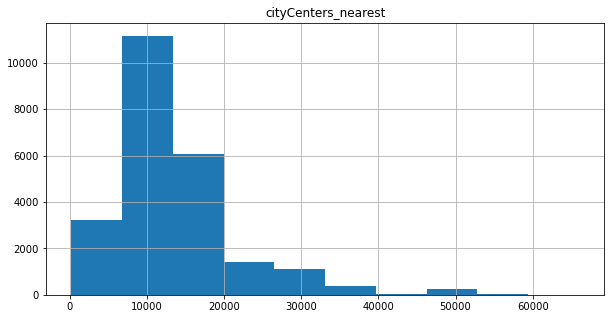

----------------------------------------

airports_nearest


count    23650.000000
mean     22063.392812
std      16463.306970
min          0.000000
25%      10147.000000
50%      21868.000000
75%      34358.000000
max      84869.000000
Name: airports_nearest, dtype: float64

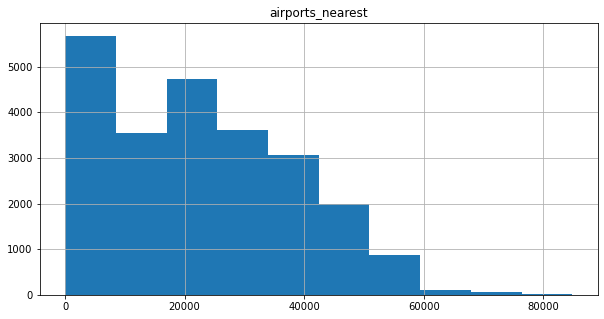

----------------------------------------

parks_nearest


count    23650.000000
mean       167.359789
std        306.832134
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

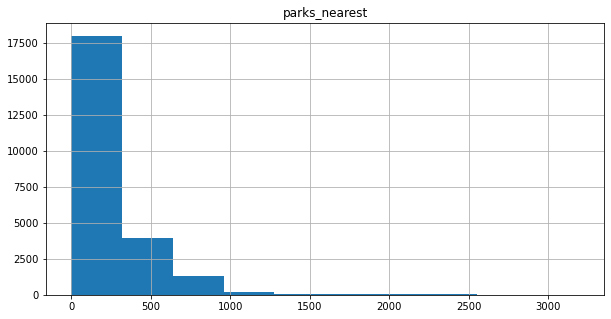

----------------------------------------

year


count    23650.000000
mean      2017.370021
std          1.037806
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year, dtype: float64

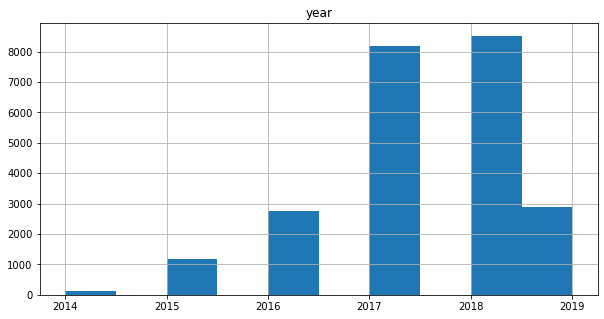

----------------------------------------

month


count    23650.000000
mean         6.401564
std          3.491418
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

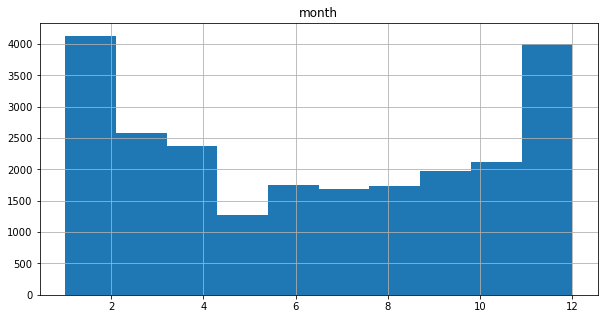

----------------------------------------



In [73]:
cat = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'floor', 'floors_total',
       'ceiling_height', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'year', 'month']

for name in cat:
    print(name)
    display(data[name].describe())
    data.hist(name, grid=True, figsize = (10,5))
    plt.title(name)
    plt.show()
    print('-' * 40)
    print()
    

<b>Вывод

<br>- Общая площадь от 12 до 900 кв. м. Cреднее значение 60. Медиана 52 кв. м.
<br>- Цены на недвижимость имеют среднее значение в 6,5 млн руб. Медиана 4,6 млн руб.
<br>- Количество комнат от 1 до 19. Среднее значение - 2.
<br>- Высота потолков в среднем составляет 2,77 м. Медиана 2,65 м.
<br>- Жилая площадь от 17 до 409 кв. м. Среднее значение 31 кв. м. Медиана 29 кв. м.
<br>- Площадь кухни от 6 до 112 кв. м. Среднее значение 9 кв. м. Медиана 9 кв. м.
<br>- Этаж квартиры до 33. Среднее значение 5 этаж. Медианное значение 4.
<br>- Тип этажа - другой (не последний и не первый)
<br>- Общее количество этажей в доме до 60. Среднее значение 10 этаж. Медианное значение 9.
<br>- Расстояние до центра до 65 км. Cреднее значение 10 км. Медиана 11 км.
<br>- Расстояние до аэропорта до 84 км. Cреднее значение 22 км. Медиана 21 км.
<br>- Расстояние до парка до 3 км. Cреднее значение 167 м. Медиана 0.
<br>- Объявления больше всего публиковались в 2018 году.
<br>- Самый частый месяц публикаций - декабрь.


Средняя квартира, выставленная на продажу, имеет следующие характеристики: это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, на 5 этаже, который является не последнем в доме. Жилая площадь и кухонная - 31 кв.м., 9 кв.м., соответственно. Цена 4,7 млн рублей и проданная за 3 месяца (95 дней).

Аномальные характеристики квартир из представленного набора данных:
<br>- 7-комнатная квартира или больше
<br>- с очень низкими или слишком высокими потолками
<br>- по цене более 12 млн рублей
<br>- проданная за 14 месяцев или более

<b>Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

<AxesSubplot:ylabel='Frequency'>

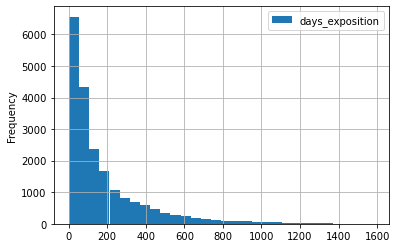

In [74]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True)

In [75]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [124]:
data[data['days_exposition']!=0]['days_exposition'].value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      203
         ... 
1553.0      1
793.0       1
1434.0      1
1231.0      1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

<b>Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

In [76]:
def drive_ratio_graph(data, name, value):
    data.pivot_table(index=round(data[name] / 10), values=value).plot(
    style='-o', figsize=(14, 7), grid=True, title=name)
    print('Корреляция для', name,'составляет:',data[name].corr(data[value]),  "\n" * 2)
    print('Описательная статистика:', "\n",data.pivot_table(index=round(data[name] / 10), values=value).describe(),  "\n" * 2, "-----------------------" ,"\n" * 2)
   

In [77]:
def drive_ratio(data, name, value):
    data.pivot_table(index=name, values=value).plot(
    style='-o', figsize=(14, 7), grid=True, title=name)
    print('Корреляция для', name,'составляет:',data[name].corr(data[value]),  "\n" * 2)
    print('Описательная статистика:', "\n", data.pivot_table(index=name, values=value).describe(), "\n" * 2, "-----------------------" ,"\n" * 2)

Корреляция для total_area составляет: 0.6537428966335397 


Описательная статистика: 
          last_price
count  5.400000e+01
mean   6.023969e+07
std    7.415131e+07
min    2.054333e+06
25%    2.021983e+07
50%    4.390326e+07
75%    6.841322e+07
max    4.200000e+08 

 ----------------------- 


Корреляция для living_area составляет: 0.5396419893011264 


Описательная статистика: 
          last_price
count  3.500000e+01
mean   5.408310e+07
std    5.412517e+07
min    3.710085e+06
25%    1.885021e+07
50%    3.969892e+07
75%    6.619000e+07
max    2.425000e+08 

 ----------------------- 


Корреляция для kitchen_area составляет: 0.3973584978233149 


Описательная статистика: 
          last_price
count  1.200000e+01
mean   6.009159e+07
std    6.984131e+07
min    5.141412e+06
25%    2.054717e+07
50%    3.859856e+07
75%    6.684121e+07
max    2.525000e+08 

 ----------------------- 


Корреляция для rooms составляет: 0.36342062218770504 


Описательная статистика: 
          last_price
cou

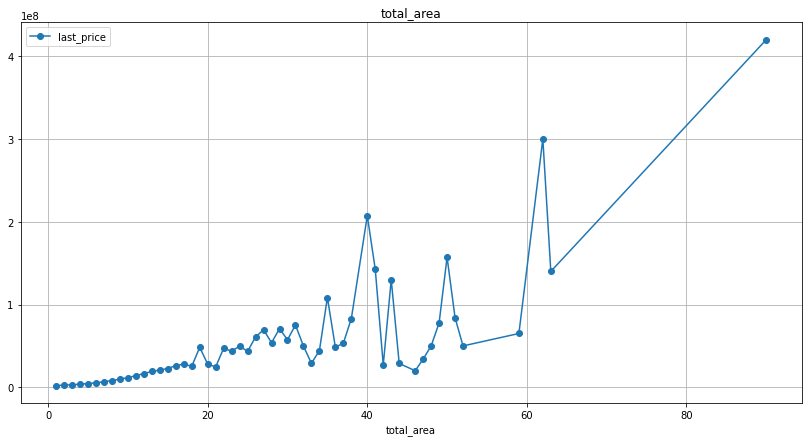

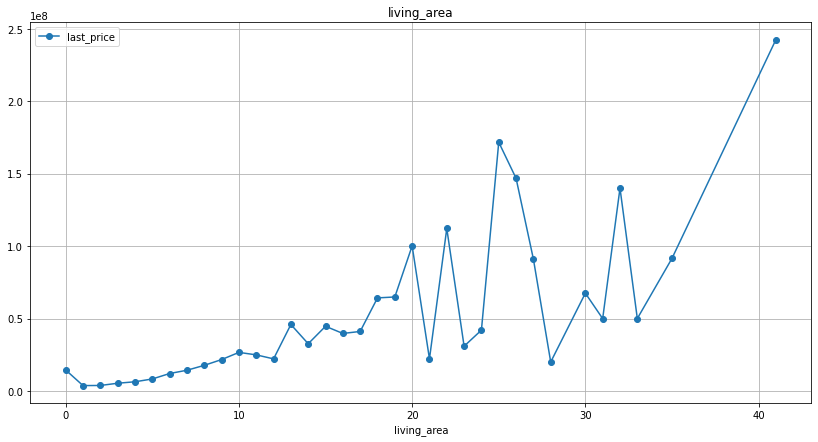

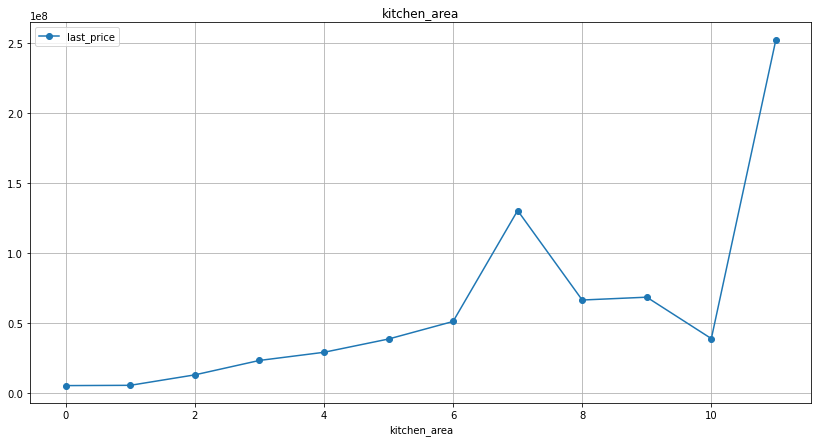

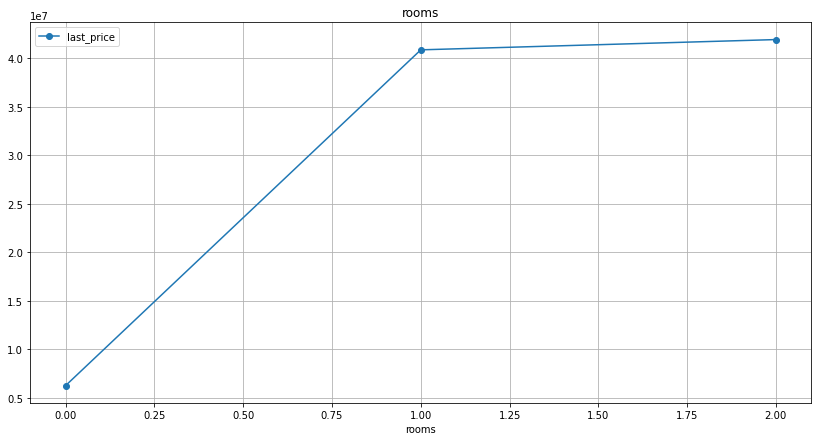

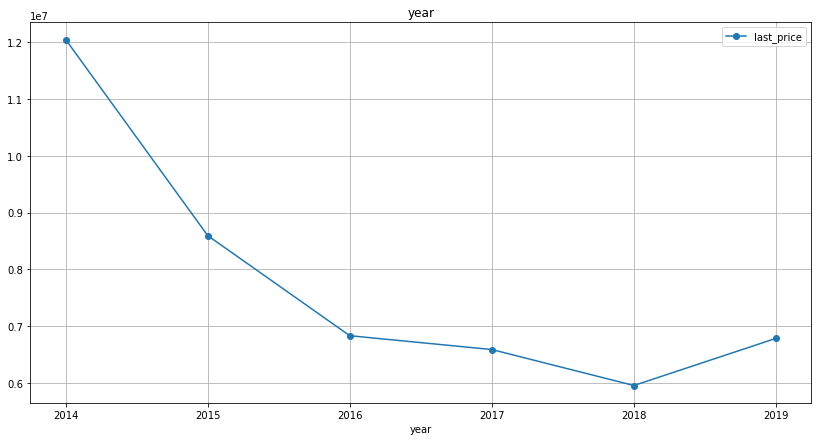

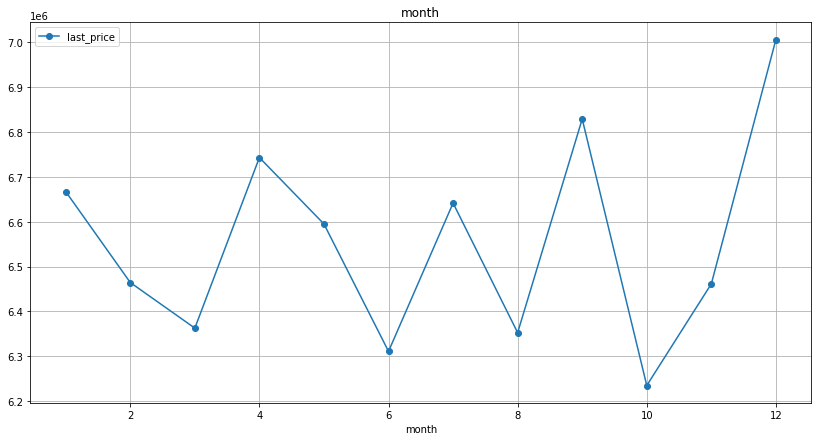

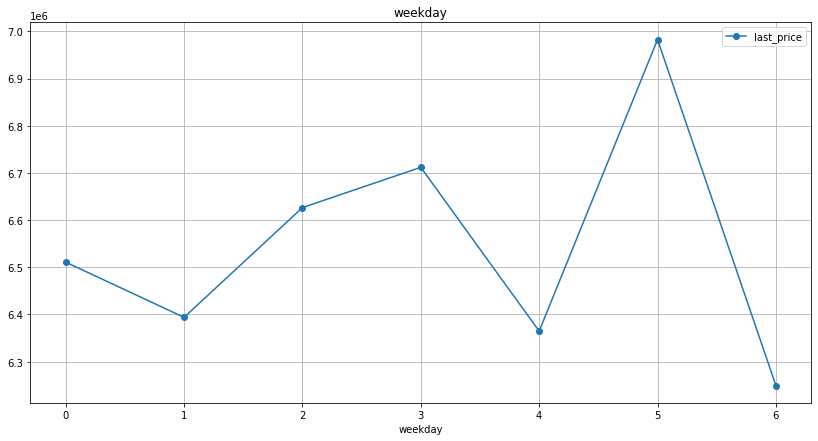

In [78]:
drive_ratio_graph(data, 'total_area', 'last_price')
drive_ratio_graph(data, 'living_area', 'last_price')
drive_ratio_graph(data, 'kitchen_area', 'last_price')
drive_ratio_graph(data, 'rooms', 'last_price')
drive_ratio(data, 'year', 'last_price')
drive_ratio(data, 'month', 'last_price')
drive_ratio(data, 'weekday', 'last_price')

,last_price
count,3.000000e+00
mean,6.277984e+06
std,1.324587e+06
min,4.800465e+06
25%,5.737407e+06
50%,6.674349e+06
75%,7.016743e+06
max,7.359138e+06


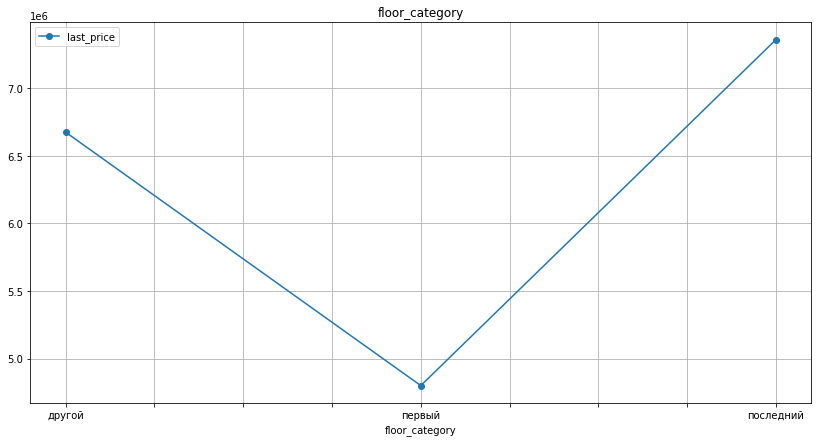

In [79]:
data.pivot_table(index='floor_category', values='last_price').plot(style='-o', figsize=(14, 7), grid=True, title='floor_category')
data.pivot_table(index='floor_category', values='last_price').describe()

<AxesSubplot:>

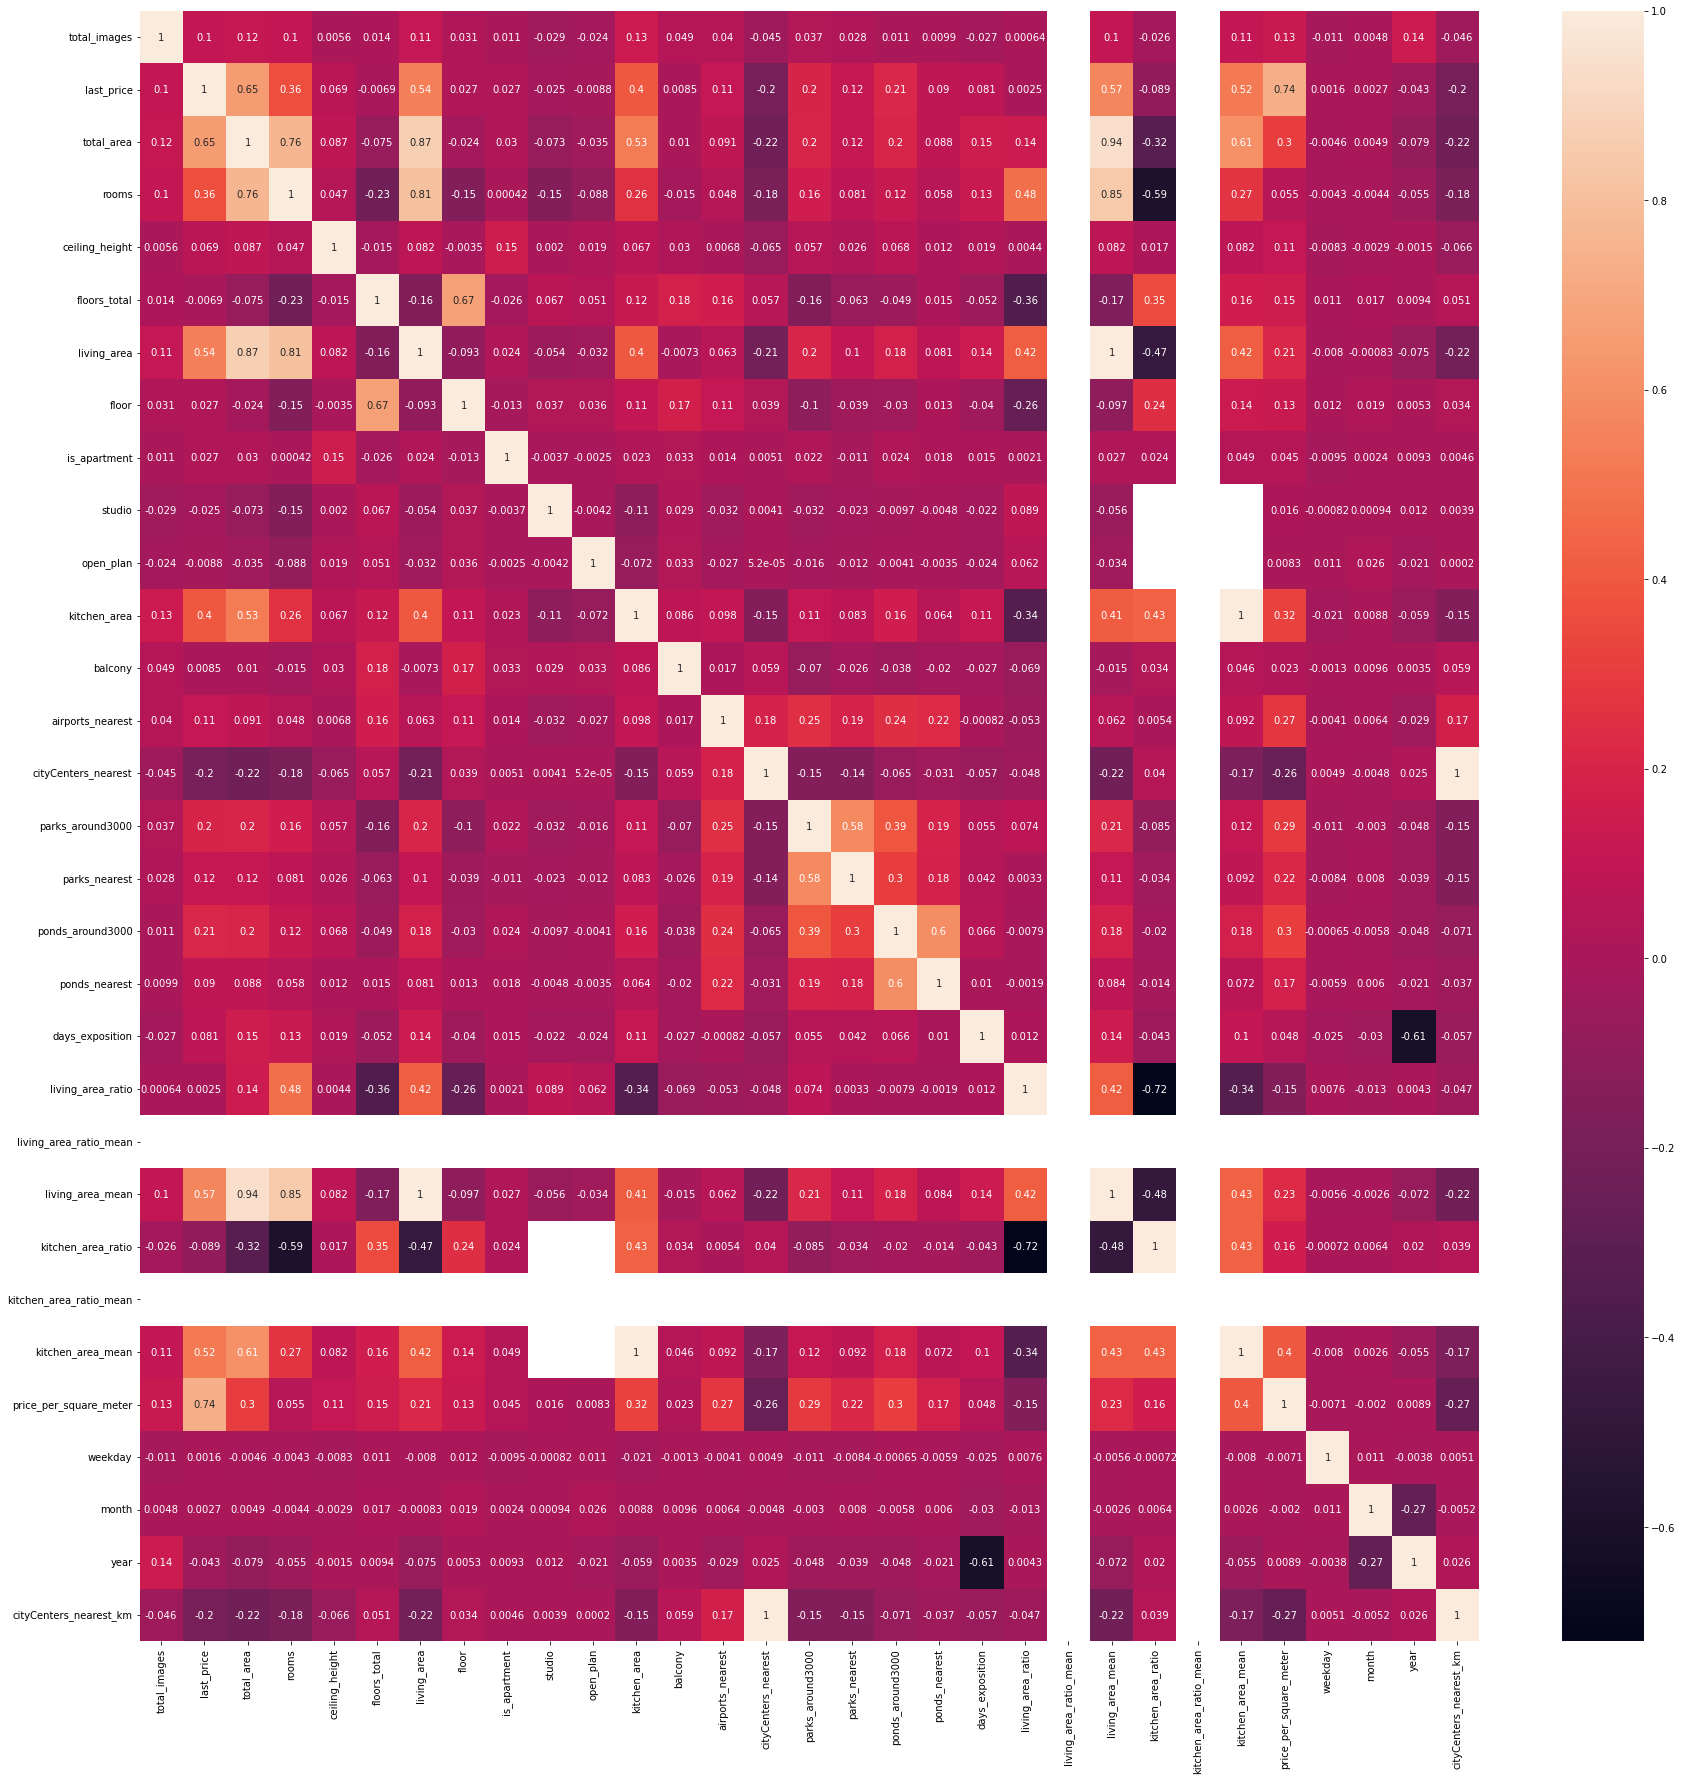

In [80]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax=ax)

<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='total_area'>

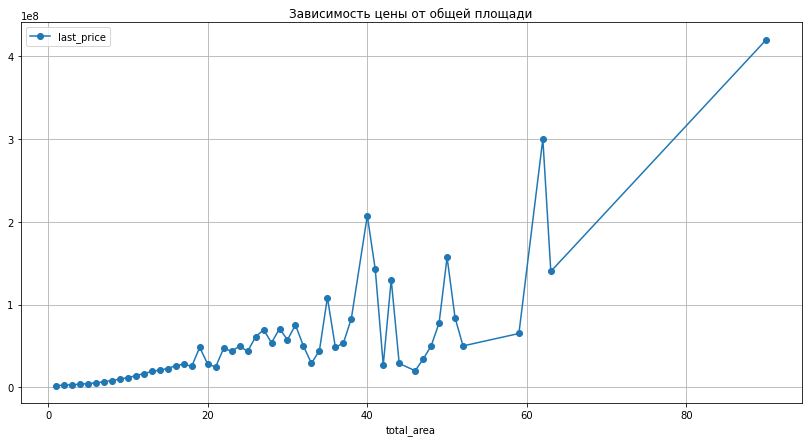

In [133]:
data.total_area = round(data.total_area / 10)
data.pivot_table(index='total_area', values='last_price').plot(
    style='-o', figsize=(14, 7), grid=True, title='Зависимость цены от общей площади'
)

<b>Вывод</b>

Факторы, влияющие на стоимость квартиры
<br> - Наиболее сильная корреляция наблюдается между площадью квартиры и ее стоимостью, площадью кухни и ее стоимостью (коэфф. корреляции 0,30 и 0,33).
<br> - Стоимость квартиры также напрямую зависит от числа комнат: чем их больше, тем квартира дороже.
<br> - Квартиры на первом или последнем этаже обычно продаются по более низкой цене, чем квартиры на других этажах.
<br> - День недели и месяц публикации объявления не играют значимой роли на стоимость, по которой объект недвижимости будет продан. 

<b>Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name

In [81]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
Пушкин,369,103125.373984
деревня Кудрово,299,92473.086957
поселок Парголово,327,90175.489297
поселок Мурино,556,85681.305755
поселок Шушары,440,78676.904545
Колпино,338,75424.150888
Гатчина,307,68745.693811
Всеволожск,398,68654.007538


In [82]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


In [83]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,58141.489451


<b>Вывод

Лидеры по средней цене квадратного метра: Санкт-Петербург, Пушкин, деревня Кудрово и поселок Парголово.
В среднем дешевле всего квадратные метры в Выборге, дороже - в Питере.

<b>Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [84]:
#Найдем расстояние от которого мы будем считать центр Питера

In [85]:
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest_km'].notna()), 'cityCenters_nearest_km'].apply(round)
spb_data = data.query('locality_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index='cityCenters_nearest_km', values=['price_per_square_meter', 'last_price'], aggfunc='median')
spb_center_nearest.head()

,last_price,price_per_square_meter
cityCenters_nearest_km,,
0,11750000.0,138536.5
1,10835000.0,123966.0
2,9500000.0,116363.0
3,8500000.0,110079.5
4,9900000.0,126086.0


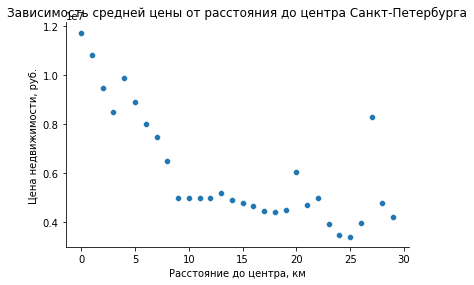

In [86]:
sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest, height=4, aspect=1.4)
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

In [87]:
spb_center = data[(data['cityCenters_nearest_km'] <= 8) & (data['locality_name'] == 'Санкт-Петербург')]

In [88]:
#Центр найден, проанализируем данные

In [89]:
spb_center['last_price'].describe()

count    4.382000e+03
mean     1.376875e+07
std      2.296136e+07
min      1.600000e+06
25%      6.207104e+06
50%      8.707500e+06
75%      1.350000e+07
max      7.630000e+08
Name: last_price, dtype: float64

Зависимость цены от общей площади

In [90]:
spb_center['total_area'].describe()

count    4382.000000
mean       88.570032
std        57.929565
min        12.000000
25%        53.225000
50%        75.000000
75%       104.840000
max       900.000000
Name: total_area, dtype: float64

In [91]:
spb_center['total_area'].corr(spb_center['price_per_square_meter'])

0.2606970139240639

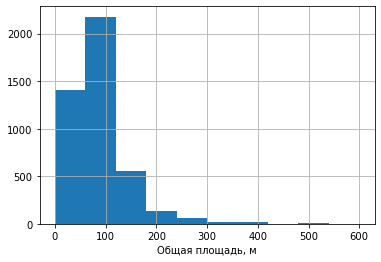

In [92]:
spb_center['total_area'].hist(range=(0,600))
plt.xlabel('Общая площадь, м')
plt.show()

Зависимость цены от даты публикации

In [93]:
spb_center['days_exposition'].describe()

count    3675.000000
mean      237.781769
std       270.212217
min         3.000000
25%        57.000000
50%       130.000000
75%       329.000000
max      1572.000000
Name: days_exposition, dtype: float64

In [94]:
spb_center['days_exposition'].corr(spb_center['price_per_square_meter'])

0.0396229234012805

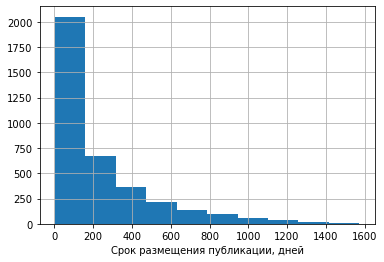

In [95]:
spb_center['days_exposition'].hist()
plt.xlabel('Срок размещения публикации, дней')
plt.show()

Зависимость цены от высоты потолков

In [96]:
spb_center['ceiling_height'].describe()

count    4382.000000
mean        2.982136
std         1.676282
min         2.000000
25%         2.700000
50%         3.000000
75%         3.100000
max       100.000000
Name: ceiling_height, dtype: float64

In [97]:
spb_center['ceiling_height'].corr(spb_center['price_per_square_meter'])

0.09095821316625682

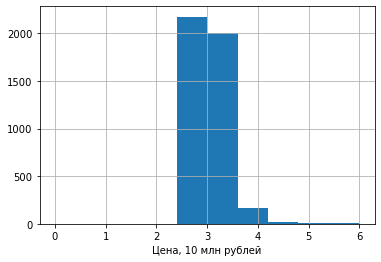

In [98]:
spb_center['ceiling_height'].hist(range=(0,6))
plt.xlabel('Цена, 10 млн рублей')
plt.show()

Зависимость цены от количества комнат

In [99]:
spb_center['rooms'].describe()

count    4382.000000
mean        2.720904
std         1.410307
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

In [100]:
spb_center['rooms'].corr(spb_center['price_per_square_meter'])

0.020596415282685215

,mean,count,median
rooms,,,
1,145564.898769,731,135714.0
2,136733.284753,1338,123513.0
3,139505.223043,1354,116335.0
7,167223.055556,54,109996.0
4,140066.323583,547,109900.0
5,144818.826667,225,104662.0
6,153308.627907,86,104248.0


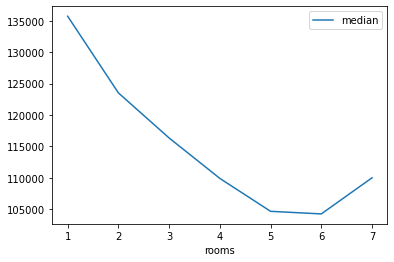

In [101]:
pivot_table_rooms = spb_center.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

Зависимость цены от площади кухни

In [102]:
spb_center['kitchen_area'].describe()

count    4382.000000
mean       12.576449
std         9.405592
min         1.000000
25%         8.000000
50%        11.000000
75%        15.000000
max       112.000000
Name: kitchen_area, dtype: float64

In [103]:
spb_center['kitchen_area'].corr(spb_center['price_per_square_meter'])

0.27330918280101696

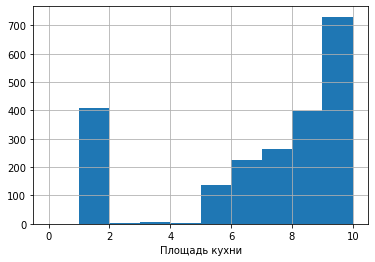

In [104]:
spb_center['kitchen_area'].hist(range=(0,10))
plt.xlabel('Площадь кухни')
plt.show()

Зависимость цены от площади кухни

In [105]:
spb_center['floor'].describe()

count    4382.000000
mean        4.481287
std         3.279980
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        25.000000
Name: floor, dtype: float64

In [106]:
spb_center['floor'].corr(spb_center['price_per_square_meter'])

0.11174076221817263

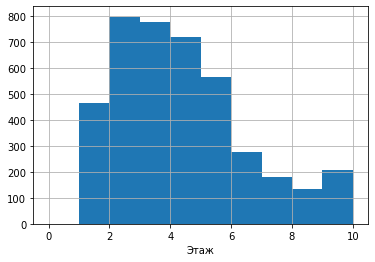

In [107]:
spb_center['floor'].hist(range=(0,10))
plt.xlabel('Этаж')
plt.show()

,mean,count,median
floor_category,,,
другой,143524.971627,3172,125862.0
первый,120247.641631,466,106670.0
последний,141931.068120,734,115764.5


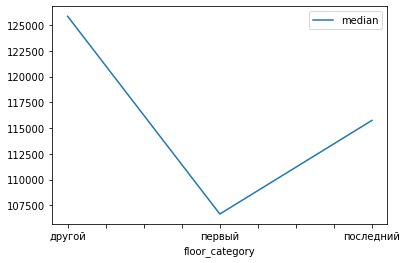

In [108]:
pivot_table_floor_category = spb_center.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

<b>Вывод

Средняя квартира, выставленная на продажу в центре Санкт-Петербурга, имеет следующие характеристики: это 2-комнатная квартира площадью 80 кв. м с потолками 2,9 м, проданная за 95 дней по цене 7 млн рублей.

Факторы, влияющие на стоимость квартиры
<br> - Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга сильнее: прямо пропорциональная зависимость цены от числа комнат. Чем больше комнат, тем выше цена.
<br> - Этаж квартиры: квартира на последнем этаже в среднем будет стоить дороже, чем на первом.
<br> - Чем дальше от центра города, тем в среднем квартира будет стоить дешевле: в среднем разница в стоимости между первым и восьмым километром от центра может достигать 2 млн руб.

### Общий вывод

В итоге исследования данных по недвижимости:

Для определения рыночной стоимости объектов недвижимости важны следующие параметры:
<br> - общая площадь квартиры (аномальные значения: более 114,25 кв. м)
<br> - расстояние до центра города (центр города огранчен окружностью радиусом 8 км)
<br> - число комнат и этаж квартиры (чем ближе к центру, тем эти факторы весомее)
<br> - срок продажи квартиры (слишком быстрая продажа — до 1 месяца (особенно аномальные сроки меньше 2-х недель), слишком долгая 
<br> - продажа — более 14 месяцев (428 дней)).
<br> - ручной ввод населённого пункта (очень много вариаций: посёлок, поселок и т.д.)
<br> - необходимо ввести ограничения на ввод данных о высоте потолков: допущено множество ручных ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.).